<b>Portfolio Variance</b>

In [1]:
import pandas as pd
import pandas_datareader.data as pdr    #Import Libraries
import datetime as dt
import numpy as np

In [2]:
ticker = ['CONCOR.NS','NESTLEIND.NS','ASIANPAINT.NS','HDFCBANK.NS','INFY.NS']   #Stocks of your portfolio
Wt_Stocks = [0.23,0.21,0.17,0.19,0.20]   #Weight per stock

In [3]:
start_date = dt.datetime(2020,4,3) - dt.timedelta(735)        # Specify the start and end date
end_date = dt.datetime(2020,4,3)

In [4]:
data = pdr.get_data_yahoo(ticker,start_date,end_date)      #Get data from Yahoo Finance API

In [5]:
df_close = data['Adj Close']     #Extract adjusted close data from whole price data
df_close

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
Date,,,,,
2018-04-02,483.306152,7987.839355,1129.236816,945.350769,524.582214
2018-04-03,492.047821,8021.487305,1131.151367,937.861206,526.104431
2018-04-04,484.649475,8028.313477,1115.343994,921.878540,518.608093
2018-04-05,482.760986,8060.229004,1122.118652,934.434631,529.379822
2018-04-06,492.300934,8024.371582,1122.707764,941.532532,519.899902
...,...,...,...,...,...
2020-03-27,309.200012,15108.599609,1604.150024,904.450012,652.700012
2020-03-30,304.250000,15658.700195,1594.949951,831.650024,626.700012
2020-03-31,331.649994,16300.599609,1666.500000,861.900024,641.500000


In [6]:
df_ret = df_close.pct_change(1)     #Find the daily return
df_ret = df_ret.round(4)             #Round to 4 decimal places
df_ret

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
Date,,,,,
2018-04-02,NaN,NaN,NaN,NaN,NaN
2018-04-03,0.0181,0.0042,0.0017,-0.0079,0.0029
2018-04-04,-0.0150,0.0009,-0.0140,-0.0170,-0.0142
2018-04-05,-0.0039,0.0040,0.0061,0.0136,0.0208
2018-04-06,0.0198,-0.0044,0.0005,0.0076,-0.0179
...,...,...,...,...,...
2020-03-27,0.0114,0.0127,-0.0079,0.0037,0.0151
2020-03-30,-0.0160,0.0364,-0.0057,-0.0805,-0.0398
2020-03-31,0.0901,0.0410,0.0449,0.0364,0.0236


In [7]:
avg_ret = df_ret.iloc[1:df_ret.size].mean()      # Find the average return over the period
avg_ret = avg_ret.round(4)   #Round to 4 decimal places
avg_ret

Symbols
CONCOR.NS       -0.0007
NESTLEIND.NS     0.0014
ASIANPAINT.NS    0.0008
HDFCBANK.NS     -0.0002
INFY.NS          0.0004
dtype: float64

In [8]:
X = df_ret - avg_ret
X = X.iloc[1:X.size]   #Excess Return Matrix (Excluding NaN value at the top)
X

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
Date,,,,,
2018-04-03,0.0188,0.0028,0.0009,-0.0077,0.0025
2018-04-04,-0.0143,-0.0005,-0.0148,-0.0168,-0.0146
2018-04-05,-0.0032,0.0026,0.0053,0.0138,0.0204
2018-04-06,0.0205,-0.0058,-0.0003,0.0078,-0.0183
2018-04-09,-0.0012,0.0028,0.0114,0.0083,-0.0144
...,...,...,...,...,...
2020-03-27,0.0121,0.0113,-0.0087,0.0039,0.0147
2020-03-30,-0.0153,0.0350,-0.0065,-0.0803,-0.0402
2020-03-31,0.0908,0.0396,0.0441,0.0366,0.0232


In [9]:
X_n = X.reset_index()       #To remove date as datetime index
X_n.drop(columns = 'Date',inplace = True)
X_n

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
0,0.0188,0.0028,0.0009,-0.0077,0.0025
1,-0.0143,-0.0005,-0.0148,-0.0168,-0.0146
2,-0.0032,0.0026,0.0053,0.0138,0.0204
3,0.0205,-0.0058,-0.0003,0.0078,-0.0183
4,-0.0012,0.0028,0.0114,0.0083,-0.0144
...,...,...,...,...,...
487,0.0121,0.0113,-0.0087,0.0039,0.0147
488,-0.0153,0.0350,-0.0065,-0.0803,-0.0402
489,0.0908,0.0396,0.0441,0.0366,0.0232
490,-0.0420,-0.0410,-0.0388,-0.0372,-0.0607


In [10]:
X_nT = X_n.loc[0:X_n.size,ticker[0]:ticker[-1]].T       # Transpose of matrix X

In [11]:
XTX = X_nT.dot(X_n)       #Transpose(X) * (X)

In [12]:
n = len(X_n.axes[0])   #Find the number of data points

In [13]:
var_cov_mtx = XTX/n                     #Find the variance covariance matrix
var_cov_mtx = var_cov_mtx.round(5)
var_cov_mtx

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
Symbols,,,,,
CONCOR.NS,0.00051,0.00013,0.00015,0.00017,0.00010
NESTLEIND.NS,0.00013,0.00030,0.00015,0.00010,0.00010
ASIANPAINT.NS,0.00015,0.00015,0.00030,0.00014,0.00009
HDFCBANK.NS,0.00017,0.00010,0.00014,0.00027,0.00010
INFY.NS,0.00010,0.00010,0.00009,0.00010,0.00039


In [14]:
S_Dev = df_ret.std()             #Find the standard deviation of each stock
S_D = pd.DataFrame(S_Dev)
S_D = S_D.round(5)
S_D

,0
Symbols,
CONCOR.NS,0.02261
NESTLEIND.NS,0.01735
ASIANPAINT.NS,0.01731
HDFCBANK.NS,0.01642
INFY.NS,0.01986


In [15]:
S_DT = S_D.T   #Find the transpose of S.D
S_DT

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
0,0.02261,0.01735,0.01731,0.01642,0.01986


In [16]:
Pro_SD = S_D.dot(S_DT)      #Dins SD * SDT
Pro_SD = Pro_SD.round(5)
Pro_SD

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
Symbols,,,,,
CONCOR.NS,0.00051,0.00039,0.00039,0.00037,0.00045
NESTLEIND.NS,0.00039,0.00030,0.00030,0.00028,0.00034
ASIANPAINT.NS,0.00039,0.00030,0.00030,0.00028,0.00034
HDFCBANK.NS,0.00037,0.00028,0.00028,0.00027,0.00033
INFY.NS,0.00045,0.00034,0.00034,0.00033,0.00039


In [17]:
corr_mtx = var_cov_mtx.div(Pro_SD)    # var_cov_mtx * Pro_SD
corr_mtx = corr_mtx.round(5)         #Correlation matrix
corr_mtx

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
Symbols,,,,,
CONCOR.NS,1.00000,0.33333,0.38462,0.45946,0.22222
NESTLEIND.NS,0.33333,1.00000,0.50000,0.35714,0.29412
ASIANPAINT.NS,0.38462,0.50000,1.00000,0.50000,0.26471
HDFCBANK.NS,0.45946,0.35714,0.50000,1.00000,0.30303
INFY.NS,0.22222,0.29412,0.26471,0.30303,1.00000


In [18]:
Wt_Stocks_df = pd.DataFrame(Wt_Stocks)           #Convert the weight of each stock into a dataframe
Wt_Stocks_df = Wt_Stocks_df.set_index(S_D.index)   #Set the index same as all others
Wt_Stocks_df

,0
Symbols,
CONCOR.NS,0.23
NESTLEIND.NS,0.21
ASIANPAINT.NS,0.17
HDFCBANK.NS,0.19
INFY.NS,0.20


In [19]:
Wt_SD = S_Dev * Wt_Stocks        # Find the weighted standard deviation of stocks
Wt_SD_df = pd.DataFrame(Wt_SD)
Wt_SD_df = Wt_SD_df.round(5)
Wt_SD_df

,0
Symbols,
CONCOR.NS,0.00520
NESTLEIND.NS,0.00364
ASIANPAINT.NS,0.00294
HDFCBANK.NS,0.00312
INFY.NS,0.00397


In [20]:
M1 = Wt_SD_df.T.dot(corr_mtx)     # Transpose(Wt_SD) * Corr_mtx
M1

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
0,0.00986,0.009125,0.009371,0.009482,0.00792


In [21]:
M2 = M1.dot(Wt_SD_df)    #M1 * Wt_SD
M2

,0
0,0.000173


In [22]:
Port_Var = M2[0].apply('sqrt')    #Sqrt(M2) = Portfolio Variance or Portfolio S.D
Port_Var = Port_Var*100
Port_Var = Port_Var.round(3)
Port_Var

0    1.316
Name: 0, dtype: float64

In [23]:
Wt_port_ret = Wt_Stocks_df.T.mul(100)    # Convert stock weights into percentages
Wt_port_ret

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
0,23.0,21.0,17.0,19.0,20.0


In [24]:
port_dret = pd.concat([Wt_port_ret,df_ret[1:]], ignore_index = True)    #Concatenate previous dataframe to weighted stocks dataframe
port_dret

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
0,23.0000,21.0000,17.0000,19.0000,20.0000
1,0.0181,0.0042,0.0017,-0.0079,0.0029
2,-0.0150,0.0009,-0.0140,-0.0170,-0.0142
3,-0.0039,0.0040,0.0061,0.0136,0.0208
4,0.0198,-0.0044,0.0005,0.0076,-0.0179
...,...,...,...,...,...
488,0.0114,0.0127,-0.0079,0.0037,0.0151
489,-0.0160,0.0364,-0.0057,-0.0805,-0.0398
490,0.0901,0.0410,0.0449,0.0364,0.0236
491,-0.0427,-0.0396,-0.0380,-0.0374,-0.0603


In [25]:
for i in range(1,len(port_dret.index)):
    port_dret.iloc[i] = port_dret.iloc[i-1]*(1+port_dret.iloc[i])     #Portfolio's daily returns

In [26]:
port_dret

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
0,23.000000,21.000000,17.000000,19.000000,20.000000
1,23.416300,21.088200,17.028900,18.849900,20.058000
2,23.065055,21.107179,16.790495,18.529452,19.773176
3,22.975102,21.191608,16.892917,18.781452,20.184458
4,23.430009,21.098365,16.901364,18.924191,19.823157
...,...,...,...,...,...
488,14.720976,39.701969,24.177811,18.198786,24.872722
489,14.485440,41.147121,24.039997,16.733784,23.882788
490,15.790578,42.834153,25.119393,17.342894,24.446422
491,15.116321,41.137921,24.164856,16.694269,22.972302


In [27]:
port_dret['NAV'] = port_dret.sum(axis = 1)     #Returns in terms of NAV
port_dret

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS,NAV
0,23.000000,21.000000,17.000000,19.000000,20.000000,100.000000
1,23.416300,21.088200,17.028900,18.849900,20.058000,100.441300
2,23.065055,21.107179,16.790495,18.529452,19.773176,99.265358
3,22.975102,21.191608,16.892917,18.781452,20.184458,100.025538
4,23.430009,21.098365,16.901364,18.924191,19.823157,100.177086
...,...,...,...,...,...,...
488,14.720976,39.701969,24.177811,18.198786,24.872722,121.672264
489,14.485440,41.147121,24.039997,16.733784,23.882788,120.289130
490,15.790578,42.834153,25.119393,17.342894,24.446422,125.533440
491,15.116321,41.137921,24.164856,16.694269,22.972302,120.085669


In [28]:
port_dret = port_dret.set_index(df_ret.index)    #Set the date index
port_dret

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS,NAV
Date,,,,,,
2018-04-02,23.000000,21.000000,17.000000,19.000000,20.000000,100.000000
2018-04-03,23.416300,21.088200,17.028900,18.849900,20.058000,100.441300
2018-04-04,23.065055,21.107179,16.790495,18.529452,19.773176,99.265358
2018-04-05,22.975102,21.191608,16.892917,18.781452,20.184458,100.025538
2018-04-06,23.430009,21.098365,16.901364,18.924191,19.823157,100.177086
...,...,...,...,...,...,...
2020-03-27,14.720976,39.701969,24.177811,18.198786,24.872722,121.672264
2020-03-30,14.485440,41.147121,24.039997,16.733784,23.882788,120.289130
2020-03-31,15.790578,42.834153,25.119393,17.342894,24.446422,125.533440


In [29]:
%matplotlib inline      

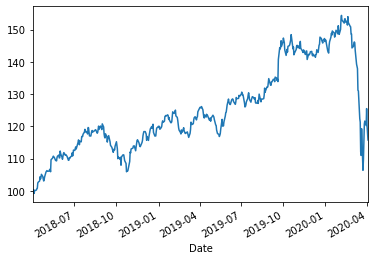

In [30]:
NAV = port_dret['NAV']
NAV.plot()                              #Plot NAV (Net Asset Value)